# 1. Load Data

-----------

In [50]:
#installing the necessary libraries
!pip install pandas numpy matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('Data_Collection\spotify_christmas_streams_kworb_2017_2025.csv') #loads dataset data
df.head() #shows first 5

,date,track,artist,streams,day_of_week,week_of_year
0,2017-11-16,All I Want for Christmas Is You,Mariah Carey,3821572,Thursday,46
1,2017-11-23,All I Want for Christmas Is You,Mariah Carey,6130250,Thursday,47
2,2017-11-23,Last Christmas,Wham!,4040197,Thursday,47
3,2017-11-30,All I Want for Christmas Is You,Mariah Carey,11641888,Thursday,48
4,2017-11-30,It's Beginning to Look a Lot Like Christmas,Michael Bublé,4577042,Thursday,48


In [53]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')  #pd.to_datetime converts to date
df['date'].dtype #<M8[ns] is NumPy's internal format for datetime64 with nanosecond precision.

dtype('<M8[ns]')

# 2. Complete Time Series Analysis (2017-2025)

-----------

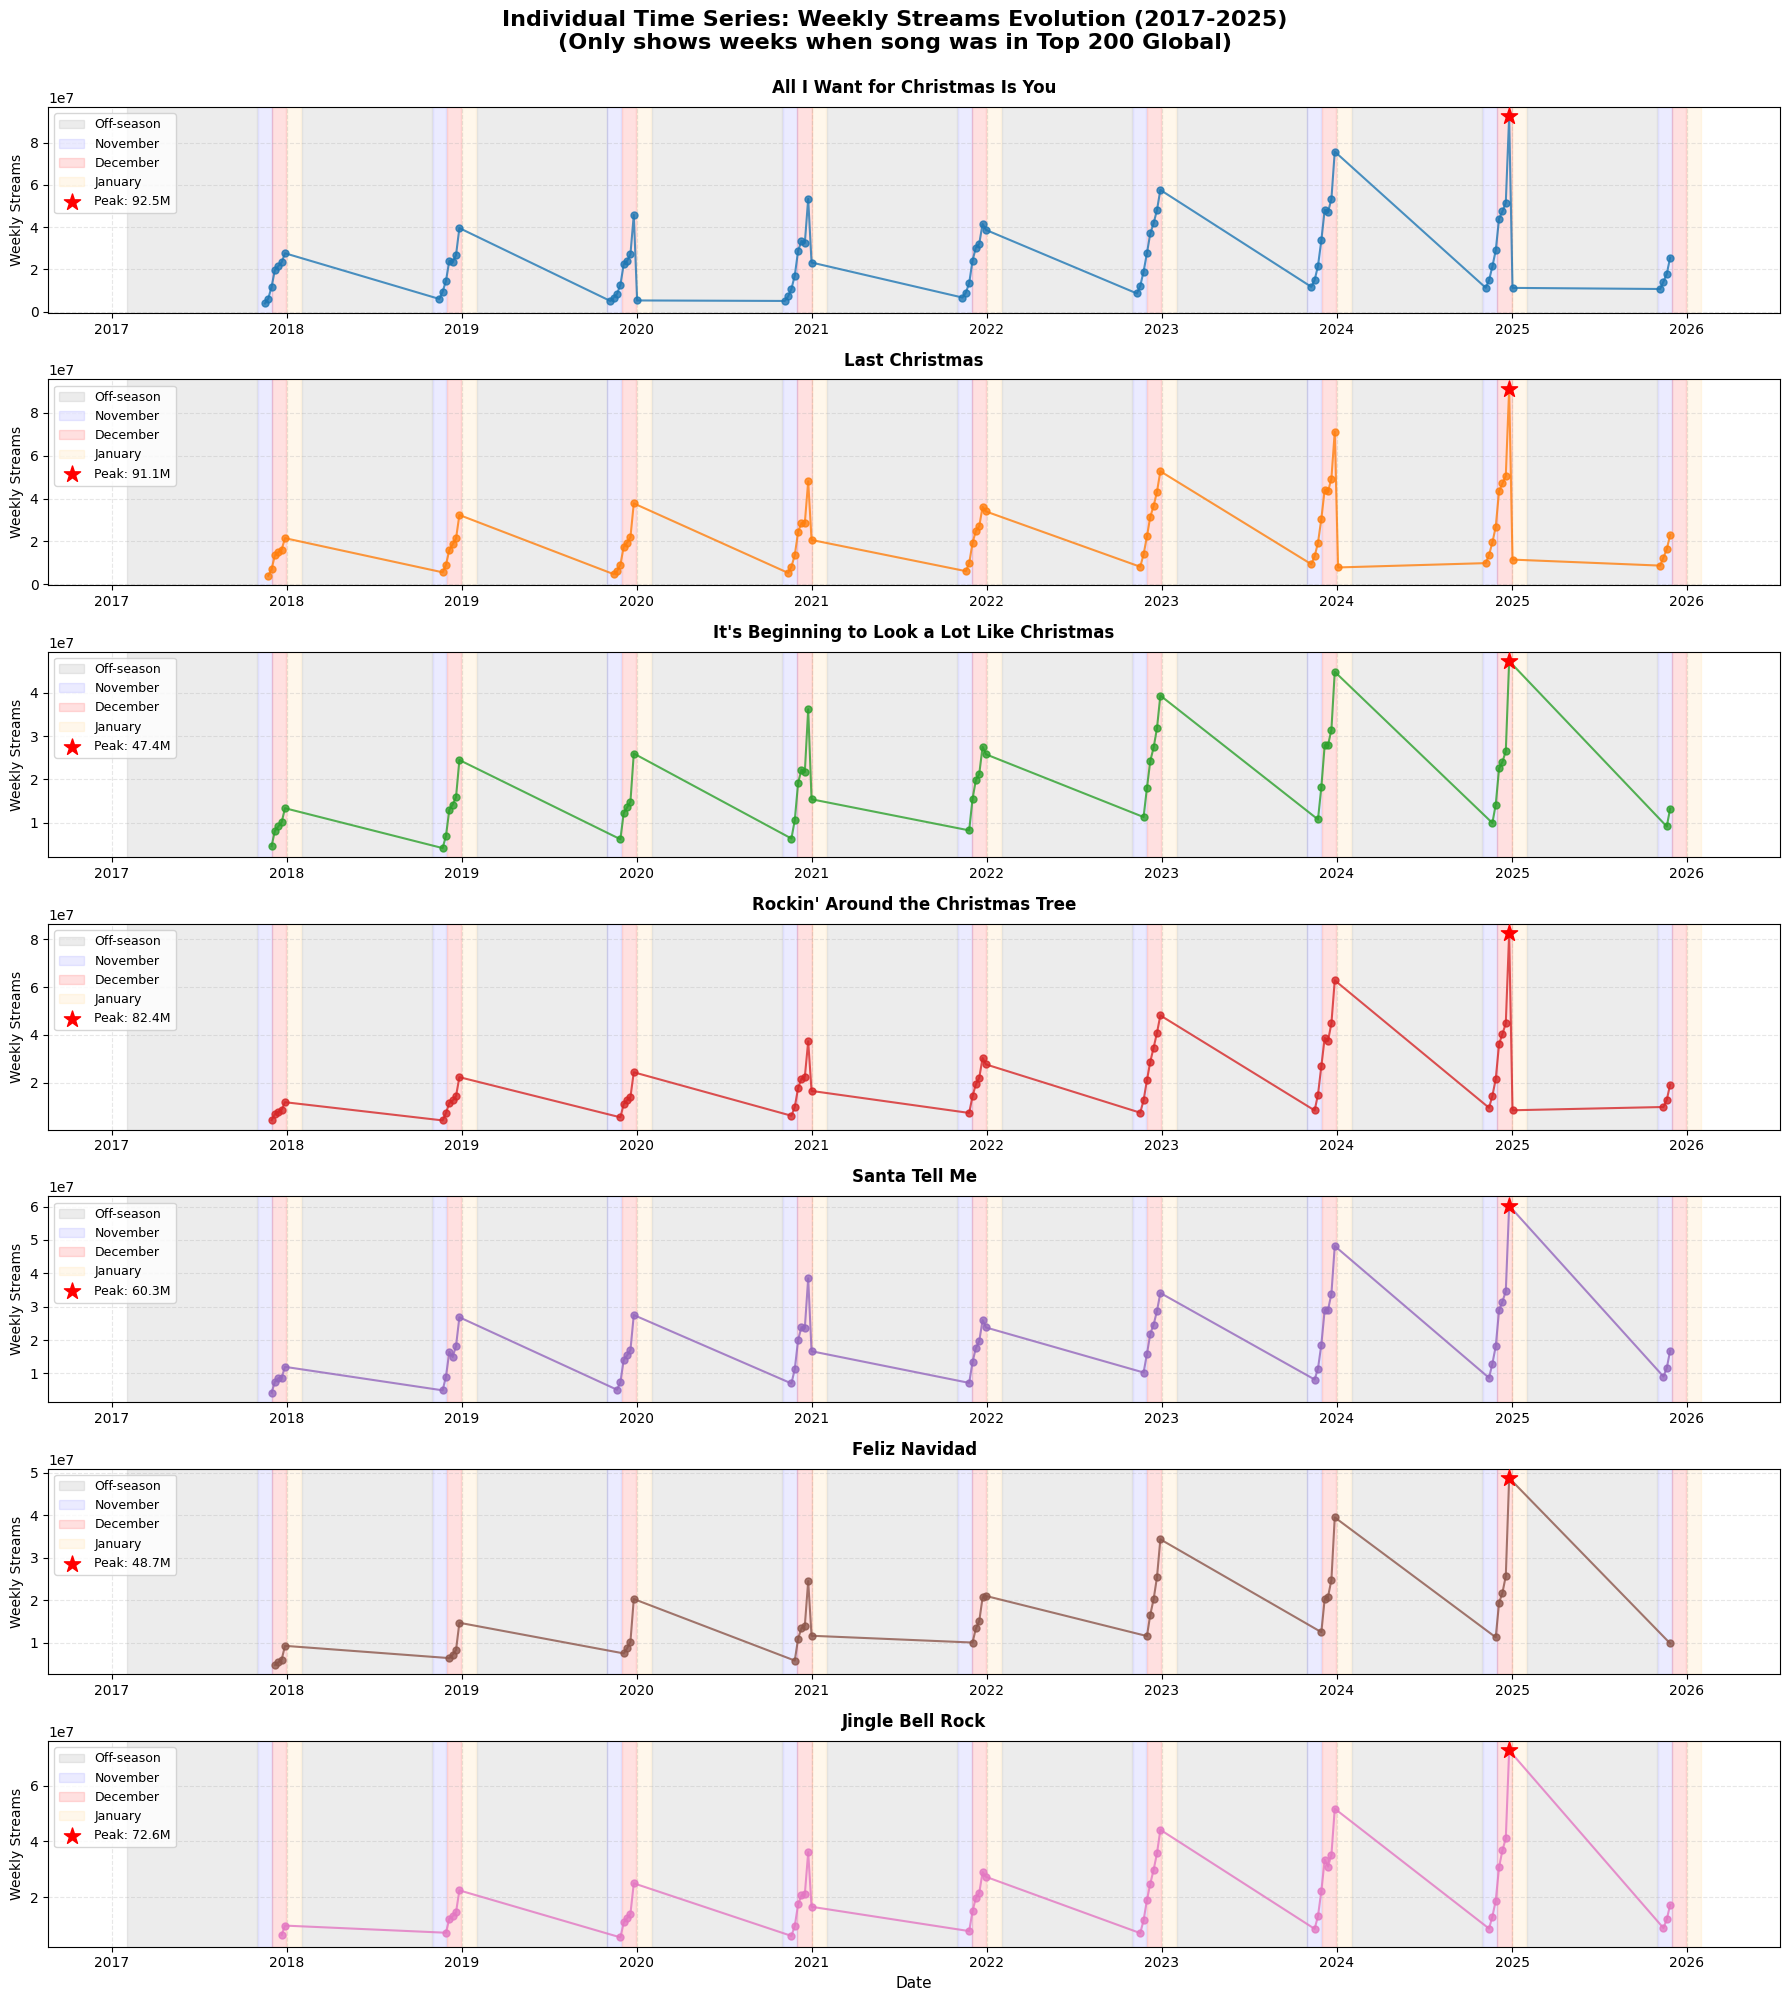

In [54]:
fig, axes = plt.subplots(7, 1, figsize=(18, 20)) #Individual time series analysis for each song
songs = df['track'].unique() #check which songs appear
colors = plt.cm.tab10(range(len(songs))) #plot color for each image

for idx, song in enumerate(songs): #for all songs
    song_data = df[df['track'] == song].sort_values('date') #check tracks for each song and sort by date
    
    # Plot with line connection AND markers
    axes[idx].plot(song_data['date'], song_data['streams'], 
                   marker='o', markersize=5, linewidth=1.5, 
                   color=colors[idx], alpha=0.8, zorder=3)
    
    axes[idx].set_title(f'{song}', fontsize=12, fontweight='bold', pad=10)
    axes[idx].set_ylabel('Weekly Streams', fontsize=10)
    axes[idx].ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    axes[idx].grid(True, alpha=0.3, linestyle='--')
    
    #Mark OFF-SEASON periods (February to October) with gray background
    for year in range(2017, 2026):
        axes[idx].axvspan(pd.Timestamp(f'{year}-02-01'), pd.Timestamp(f'{year}-10-31'), 
                          color='gray', alpha=0.15, zorder=0, label='Off-season' if year == 2017  else '')
    
    #Highlight Christmas season months (November, December, January)
    for year in range(2017, 2026):#ANALYSIS OF NOVEMBER, DECEMBER AND JANUARY FOR EACH YEAR
        #November
        axes[idx].axvspan(pd.Timestamp(f'{year}-11-01'), pd.Timestamp(f'{year}-11-30'), 
                          color='blue', alpha=0.08, zorder=1, label = 'November'if year == 2017 else '')# NOVEMBER AS BLUE 
        # the if year only appears once in the legend for november color
        #December
        axes[idx].axvspan(pd.Timestamp(f'{year}-12-01'), pd.Timestamp(f'{year}-12-31'), 
                          color='red', alpha=0.12, zorder=1, label = 'December'if year == 2017 else '') #DECEMBER AS RED
        #January
        axes[idx].axvspan(pd.Timestamp(f'{year+1}-01-01'), pd.Timestamp(f'{year+1}-01-31'), 
                          color='orange', alpha=0.08, zorder=1, label = 'January'if year == 2017 else '') #JANUARY AS ORANGE
    
    #Mark maximum peak day listened
    max_idx = song_data['streams'].idxmax() #gets id with highest value of song plays
    max_date = song_data.loc[max_idx, 'date'] #gets date where there was highest level of plays
    max_streams = song_data.loc[max_idx, 'streams']  #Gets the value of the 'streams' column from that row.
    axes[idx].scatter(max_date, max_streams, color='red', s=150, zorder=5, 
                      marker='*', label=f'Peak: {max_streams/1e6:.1f}M')
    axes[idx].legend(loc='upper left', fontsize=9)
    
axes[-1].set_xlabel('Date', fontsize=11) #xlabel being the years
plt.suptitle('Individual Time Series: Weekly Streams Evolution (2017-2025)\n(Only shows weeks when song was in Top 200 Global)', 
             fontsize=16, fontweight='bold', y=0.998) #title
plt.tight_layout()
plt.show()

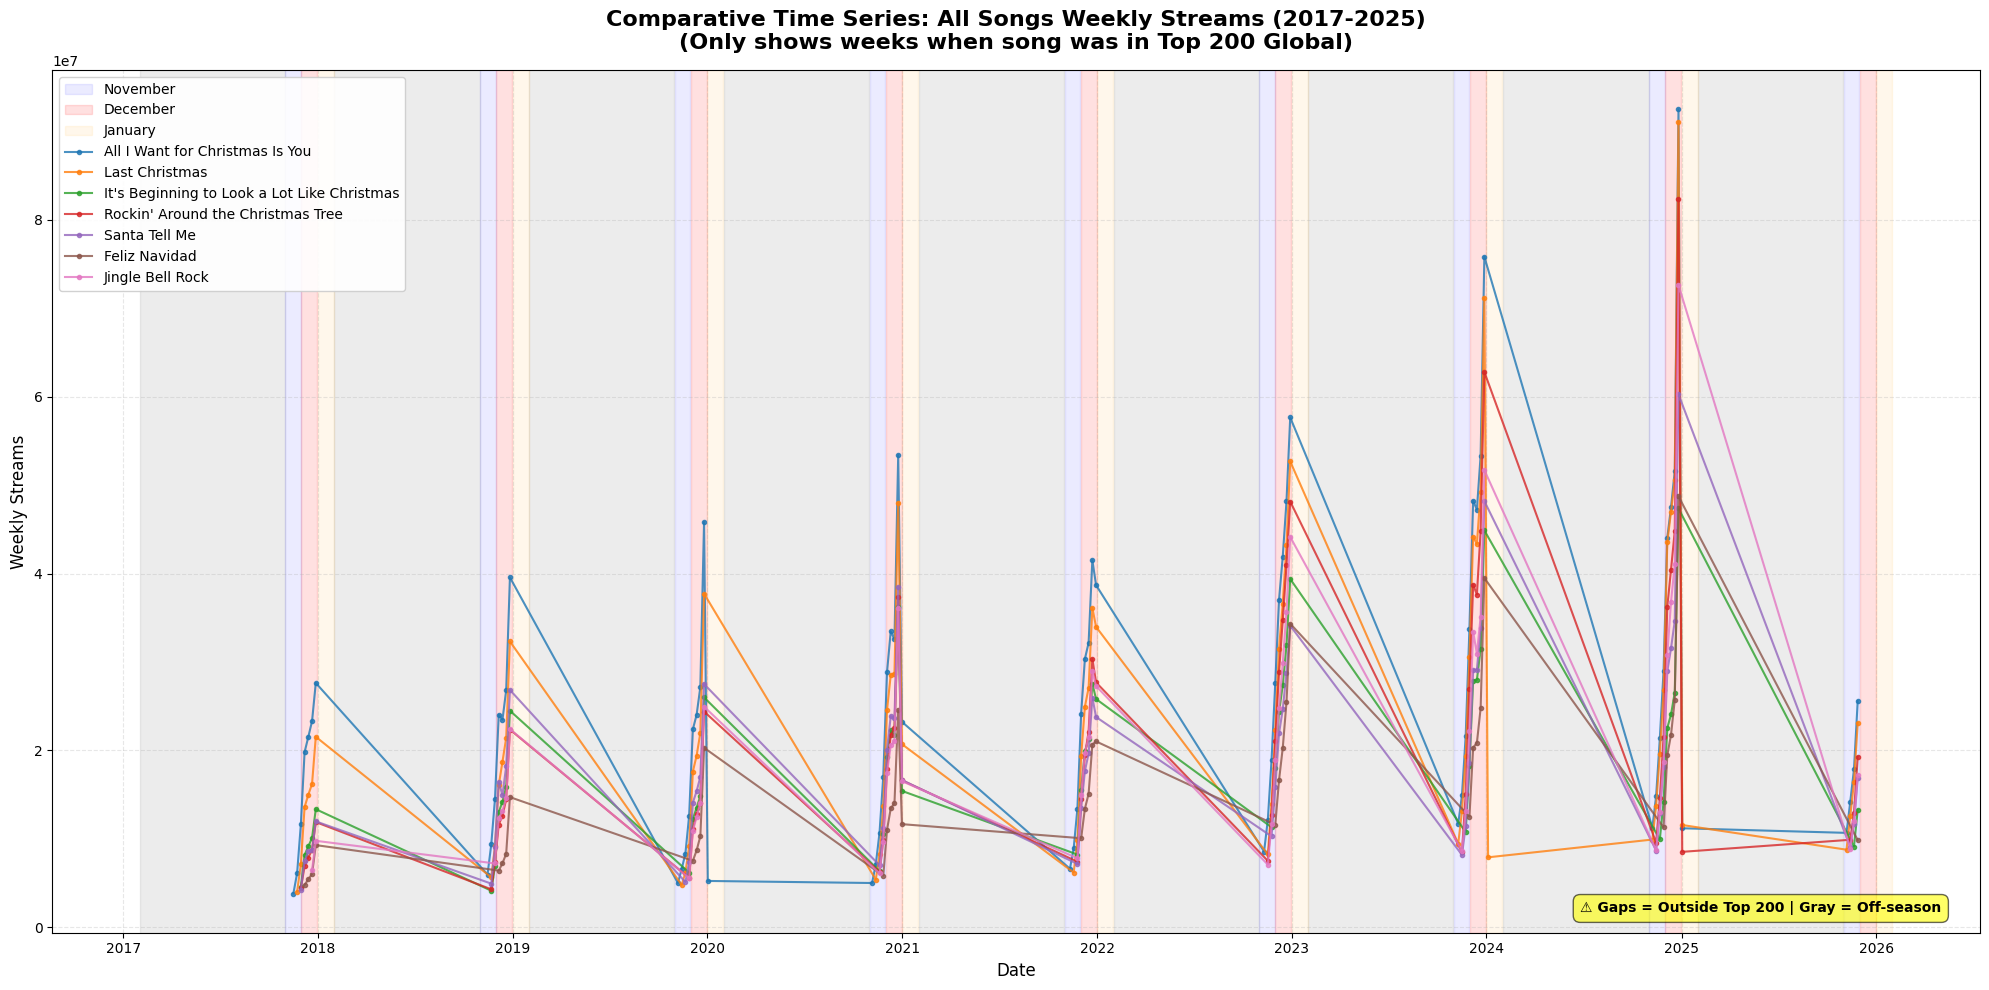

In [55]:
#Comparative time series, all songs overlayed
plt.figure(figsize=(20, 10))

for year in range(2017, 2026): # Mark OFF-SEASON periods (February to October) with gray background
    plt.axvspan(pd.Timestamp(f'{year}-02-01'), pd.Timestamp(f'{year}-10-31'), 
                color='gray', alpha=0.15, zorder=0) 

# Highlight Christmas season months (November, December, January)
for year in range(2017, 2026):
    # November
    plt.axvspan(pd.Timestamp(f'{year}-11-01'), pd.Timestamp(f'{year}-11-30'), 
                color='blue', alpha=0.08, zorder=1, label = 'November'if year == 2017 else '')
    # December
    plt.axvspan(pd.Timestamp(f'{year}-12-01'), pd.Timestamp(f'{year}-12-31'), 
                color='red', alpha=0.12, zorder=1, label = 'December'if year == 2017 else '')
    # January
    plt.axvspan(pd.Timestamp(f'{year+1}-01-01'), pd.Timestamp(f'{year+1}-01-31'), 
                color='orange', alpha=0.08, zorder=1, label ='January'if year == 2017 else '')

# Plot all songs
for idx, song in enumerate(songs):
    song_data = df[df['track'] == song].sort_values('date')
    plt.plot(song_data['date'], song_data['streams'], 
             marker='o', markersize=3, linewidth=1.5, 
             label=song, color=colors[idx], alpha=0.8, zorder=3)

plt.title('Comparative Time Series: All Songs Weekly Streams (2017-2025)\n(Only shows weeks when song was in Top 200 Global)', 
          fontsize=16, fontweight='bold', pad=15) #title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weekly Streams', fontsize=12)
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
plt.legend(loc='upper left', fontsize=10, framealpha=0.9)
plt.grid(True, alpha=0.3, linestyle='--')

# Add clear note about the off season
plt.text(0.98, 0.02, '⚠ Gaps = Outside Top 200 | Gray = Off-season', 
         transform=plt.gca().transAxes, fontsize=10, 
         ha='right', va='bottom', weight='bold',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.6))

plt.tight_layout()
plt.show()

# 3. Seasonal Pattern of Christmas Cycle

------------------

In [56]:
christmas_season = df[df['week_of_year'].isin(list(range(45, 53)) + [1])].copy() #Filter data for Christmas season (weeks 45- 52 + week 1)
weekly_avg = christmas_season.groupby(['week_of_year', 'track'])['streams'].mean().reset_index()#grouping by week and song
#calculates the average for each song separately
weekly_avg_overall = christmas_season.groupby('week_of_year')['streams'].mean().reset_index() #Grouping by week of year
# all streams from all songs together

# Sort weeks properly (45-52, then 1 (1 week of january -> "IMPORTANT"))
week_order = list(range(45, 53)) + [1]
weekly_avg['week_of_year'] = pd.Categorical(weekly_avg['week_of_year'], categories=week_order, ordered=True)
weekly_avg = weekly_avg.sort_values('week_of_year') #Sorts the weekly_avg dataframe in ascending order of the column
weekly_avg_overall['week_of_year'] = pd.Categorical(weekly_avg_overall['week_of_year'], categories=week_order, ordered=True)
weekly_avg_overall = weekly_avg_overall.sort_values('week_of_year')#Sorts the weekly_avg_overall dataframe in ascending order of the column

print("Average streams by week during Christmas season:")
# Add formatted column with values in millions
weekly_avg_overall['streams_formatted'] = weekly_avg_overall['streams'].apply(lambda x: f"{x:.2e} ({x/1e6:.1f}M)")
print(weekly_avg_overall[['week_of_year', 'streams_formatted']])

Average streams by week during Christmas season:
  week_of_year streams_formatted
1           45   8.70e+06 (8.7M)
2           46   9.15e+06 (9.2M)
3           47  1.08e+07 (10.8M)
4           48  1.50e+07 (15.0M)
5           49  2.17e+07 (21.7M)
6           50  2.37e+07 (23.7M)
7           51  2.67e+07 (26.7M)
8           52  3.87e+07 (38.7M)
0            1   8.89e+06 (8.9M)


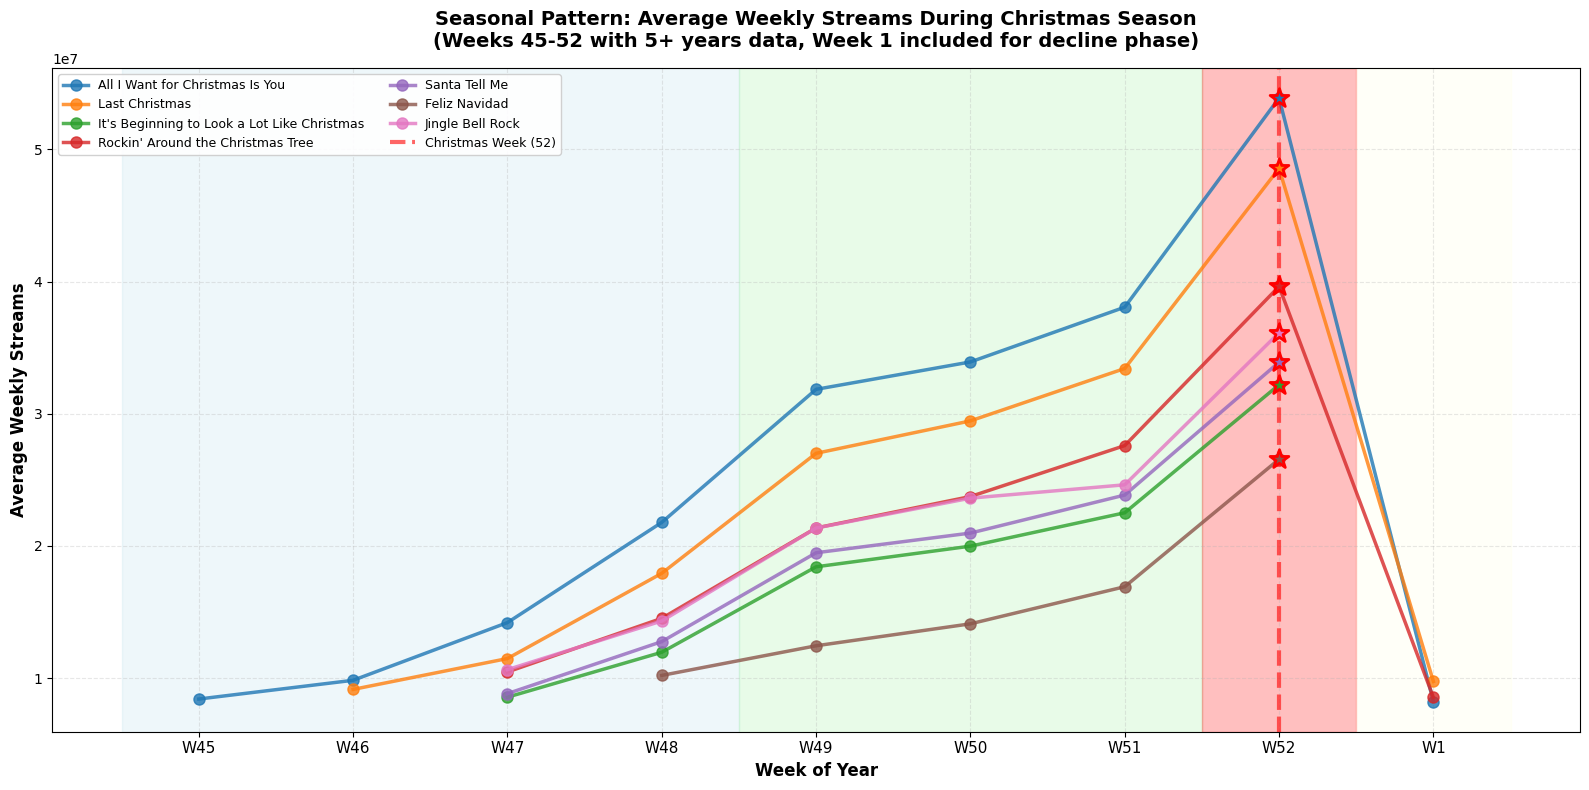

In [57]:
# Visualization: Average streams by week for each song (only weeks with data)
plt.figure(figsize=(16, 8))
for idx, song in enumerate(songs):  #for each song
    song_data = weekly_avg[weekly_avg['track'] == song] #sees the average per week for each song   
    # Filter out weeks with very few data points (likely incomplete)
    song_season = christmas_season[christmas_season['track'] == song]
    week_counts = song_season.groupby('week_of_year').size()
    # Only plot weeks that appear at least 5 times across all years
    valid_weeks_5plus = week_counts[week_counts >= 5].index
    week1_exists = 1 in week_counts.index and week_counts[1] >= 1 # BUT include week 1 if it has at least 1 data point (important for decline phase)
    if week1_exists:#If week 1 exists, adds it to the list of valid weeks; 
        valid_weeks = valid_weeks_5plus.union(pd.Index([1]))
    else:#otherwise, keeps only weeks with 5+ years of data.
        valid_weeks = valid_weeks_5plus
    
    song_data_filtered = song_data[song_data['week_of_year'].isin(valid_weeks)] #Filters song data, keeping only weeks that are in the valid_weeks list
    
    if len(song_data_filtered) > 0:
        x_positions = [week_order.index(w) for w in song_data_filtered['week_of_year']]
        plt.plot(x_positions, song_data_filtered['streams'], 
                 marker='o', markersize=8, linewidth=2.5, 
                 label=song, color=colors[idx], alpha=0.8)
        
        # Mark peak
        max_idx = song_data_filtered['streams'].idxmax()
        max_row = song_data_filtered.loc[max_idx]
        peak_week = max_row['week_of_year']
        peak_position = week_order.index(peak_week)
        plt.scatter(peak_position, max_row['streams'], 
                    color=colors[idx], s=200, marker='*', 
                    zorder=5, edgecolors='red', linewidths=2)

# Mark phases with vertical lines and background colors
plt.axvspan(-0.5, 3.5, color='lightblue', alpha=0.2)
plt.axvspan(3.5, 6.5, color='lightgreen', alpha=0.2)
plt.axvspan(6.5, 7.5, color='red', alpha=0.25)
plt.axvline(7, color='red', linewidth=3, linestyle='--', alpha=0.6, label='Christmas Week (52)')
plt.axvspan(7.5, 8.5, color='lightyellow', alpha=0.2)

plt.xticks(range(len(week_order)), [f'W{w}' for w in week_order], fontsize=11)
plt.xlabel('Week of Year', fontsize=12, fontweight='bold')
plt.ylabel('Average Weekly Streams', fontsize=12, fontweight='bold')
plt.title('Seasonal Pattern: Average Weekly Streams During Christmas Season\n(Weeks 45-52 with 5+ years data, Week 1 included for decline phase)', 
          fontsize=14, fontweight='bold', pad=15)
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
plt.legend(loc='upper left', fontsize=9, ncol=2, framealpha=0.9)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

In [58]:
week_order

[45, 46, 47, 48, 49, 50, 51, 52, 1]

In [59]:
weekly_avg['week_of_year'] = pd.Categorical(weekly_avg['week_of_year'], categories=week_order, ordered=True) #transforms the week_of_year column into ordered categorical
#meaning each week has a specific order. (45 to 52 then 1)
weekly_avg = weekly_avg.sort_values(['week_of_year', 'streams'], ascending=[True, False])#sorts first by week, then by number of streams.
pivot_table = weekly_avg.pivot(index='week_of_year', columns='track', values='streams')# transforms the dataframe from long format to wide format
#creating a table easier to analyze or plot.
pivot_table_formatted = pivot_table.applymap(lambda x: f'{x/1e6:.1f}M' if pd.notna(x) else '-')# Format values in millions

print("\nAverage streams by week for each song (in millions):")
pivot_table_formatted


Average streams by week for each song (in millions):


C:\Users\Admin\AppData\Local\Temp\ipykernel_11908\3164923838.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table_formatted = pivot_table.applymap(lambda x: f'{x/1e6:.1f}M' if pd.notna(x) else '-')# Format values in millions


track,All I Want for Christmas Is You,Feliz Navidad,It's Beginning to Look a Lot Like Christmas,Jingle Bell Rock,Last Christmas,Rockin' Around the Christmas Tree,Santa Tell Me
week_of_year,,,,,,,
45,8.4M,-,-,-,9.4M,-,-
46,9.8M,-,-,8.3M,9.1M,8.9M,8.6M
47,14.2M,-,8.6M,10.6M,11.5M,10.5M,8.8M
48,21.8M,10.2M,11.9M,14.3M,17.9M,14.5M,12.8M
49,31.8M,12.4M,18.4M,21.4M,27.0M,21.4M,19.5M
50,33.9M,14.1M,20.0M,23.6M,29.5M,23.7M,21.0M
51,38.1M,16.9M,22.5M,24.6M,33.4M,27.6M,23.8M
52,53.9M,26.6M,32.2M,36.1M,48.6M,39.6M,33.9M
1,8.2M,-,-,-,9.7M,8.5M,-


# 4. Annual Trend Analysis (2017-2025)

---------

In [162]:
df['year'] = df['date'].dt.year #creates a new year column for the dataframe. the code extracts the year from the date column
annual_streams = df.groupby(['year', 'track'])['streams'].sum().reset_index() #groups data by year and song and calculates the number of streams for each one
annual_streams_total = df.groupby('year')['streams'].sum().reset_index() #groups only by year, ignoring which song it is, thus seeing only the sum of all streams from the 7 songs in the year

In [163]:
# Calculate CAGR (Compound Annual Growth Rate) from 2017 to 2024
initial_value = annual_streams_total[annual_streams_total['year'] == 2017]['streams'].values[0] # gets total streams in 2017
final_value = annual_streams_total[annual_streams_total['year'] == 2024]['streams'].values[0]  #gets total streams in 2024 (last complete year)
years = 2024- 2017 #difference between years
cagr = (((final_value / initial_value) ** (1 / years)) - 1) * 100 #annual growth rate
print(initial_value, final_value, cagr)

359461696 1560494532 23.33521360527815


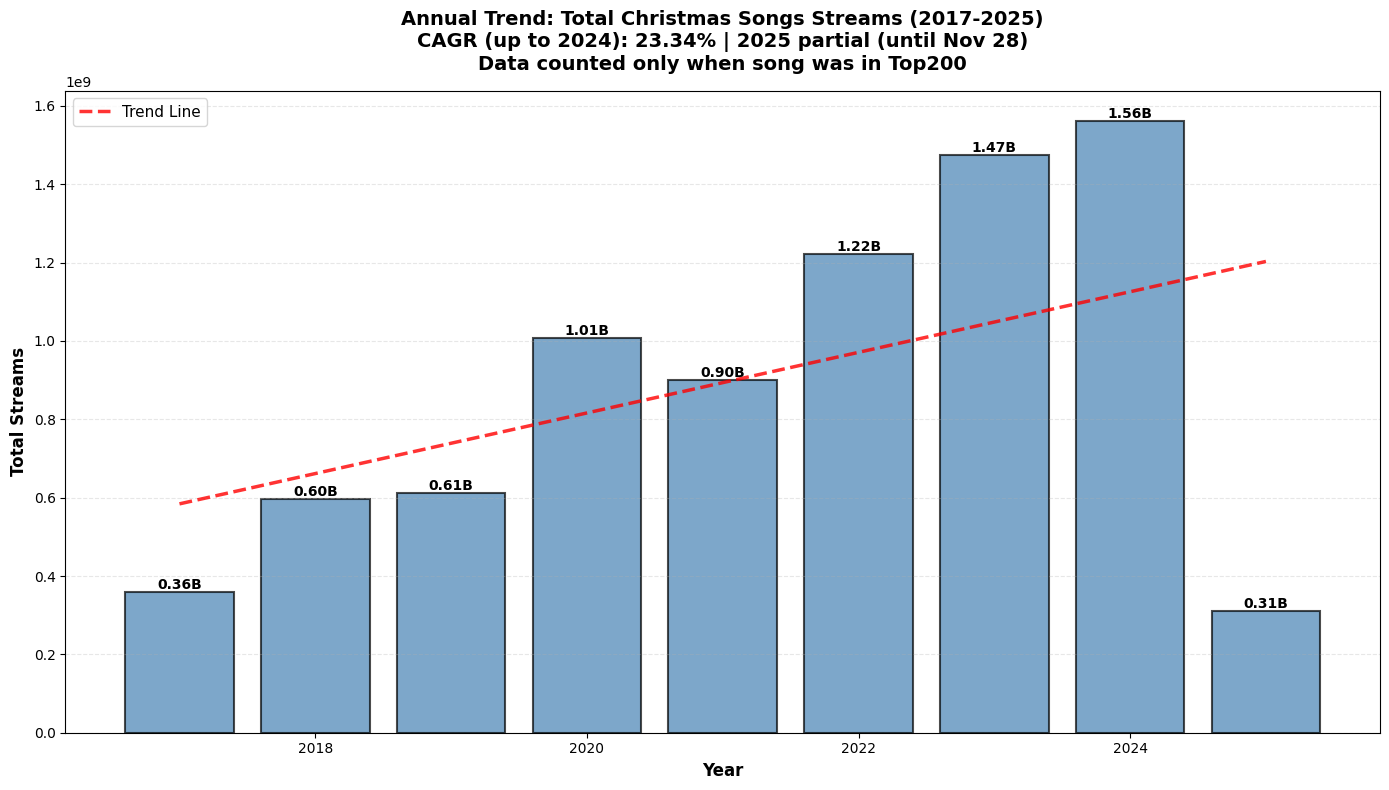

In [164]:
#Visualization: Total streams per year with trend line
fig, ax1 = plt.subplots(figsize=(14, 8))
bars = ax1.bar(annual_streams_total['year'], annual_streams_total['streams'], #Creates vertical bars from total streams data of the 7 songs combined (declared above)
               color='steelblue', alpha=0.7, edgecolor='black', linewidth=1.5) #x axis being years and y axis being total streams in the year

#Add value labels on bars
for bar in bars: #iterates through each bar individually
    height = bar.get_height() #gets the numeric value of the bar, height will be the total streams in the year
    ax1.text(bar.get_x() + bar.get_width()/2., height, #text label on graph, shifts text to center of bar
             f'{height/1e9:.2f}B',  
             ha='center', va='bottom', fontsize=10, fontweight='bold') #text alignment

# Trend line (linear regression)
z = np.polyfit(annual_streams_total['year'], annual_streams_total['streams'], 1)#performs polynomial fitting on data:
#x → horizontal axis (year)
#y → vertical axis (streams)
#deg -> 1, linear regression
p = np.poly1d(z) #creates a polynomial function from the coefficients.
ax1.plot(annual_streams_total['year'], p(annual_streams_total['year']), # p(annual_streams_total['year'] -> find streams value from streams quantity input
                                                                        # from m values found above in regression
         "r--", linewidth=2.5, label=f'Trend Line', alpha=0.8)

ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Total Streams', fontsize=12, fontweight='bold')
ax1.set_title(
    f'Annual Trend: Total Christmas Songs Streams (2017-2025)\n'
    f'CAGR (up to 2024): {cagr:.2f}% | 2025 partial (until Nov 28)\n'
    f'Data counted only when song was in Top200',
    fontsize=14, fontweight='bold', pad=15
)

ax1.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
ax1.grid(True, alpha=0.3, linestyle='--', axis='y')
ax1.legend(loc='upper left', fontsize=11)

plt.tight_layout()
plt.show()

0     359461696
1     595483091
2     610773167
3    1007560272
4     901269455
5    1222813294
6    1474219424
7    1560494532
8     310445852
Name: streams, dtype: int64 0             NaN
1    3.594617e+08
2    5.954831e+08
3    6.107732e+08
4    1.007560e+09
5    9.012695e+08
6    1.222813e+09
7    1.474219e+09
8    1.560495e+09
Name: streams, dtype: float64
0          NaN
1    65.659679
2     2.567676
3    64.964724
4   -10.549326
5    35.676771
6    20.559650
7     5.852257
8   -80.105931
Name: yoy_growth, dtype: float64


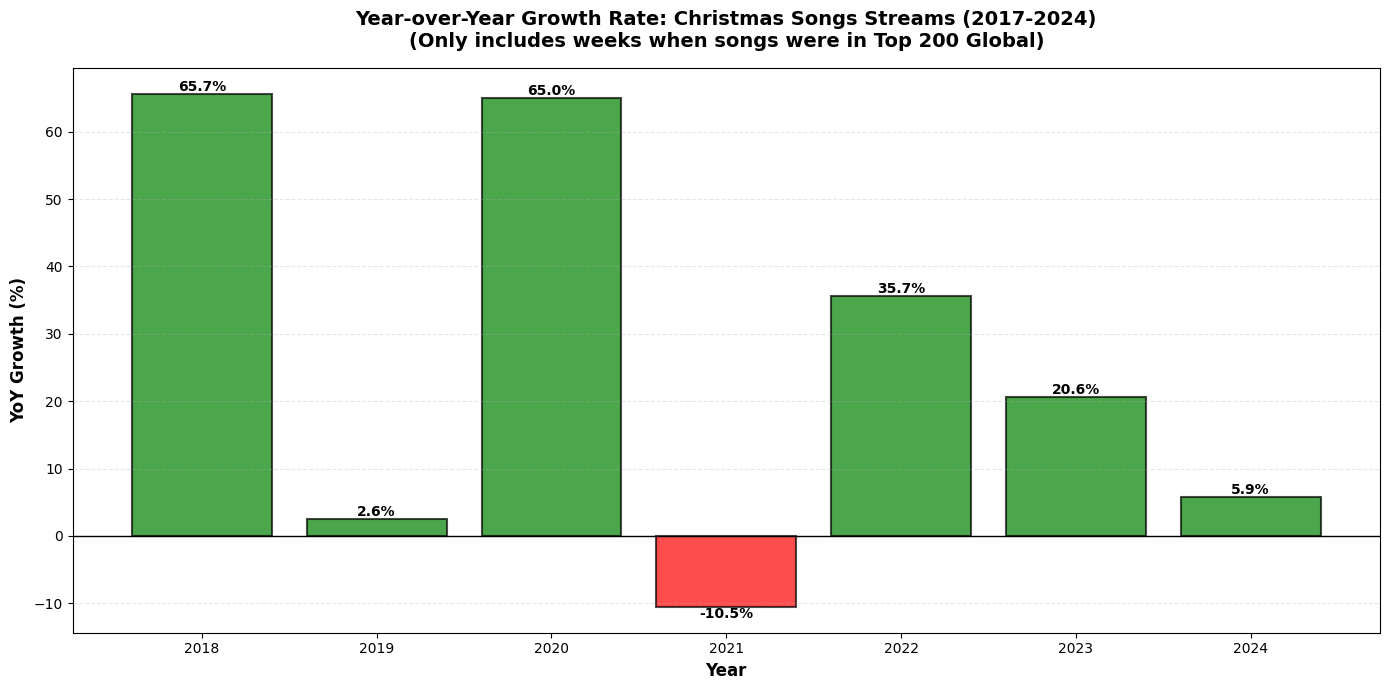

In [165]:
# Calculate Year-over-Year (YoY) growth first
annual_streams_total['yoy_growth'] = ((annual_streams_total['streams'] - annual_streams_total['streams'].shift(1)) #shift method moves one row down the stream column
                                      / annual_streams_total['streams'].shift(1)) * 100 #calculates the percentage, example calculation (streams(2018) - streams(2017)) / streams(2017)
#creates a new column with this growth data for each difference between years.
print(annual_streams_total['streams'],annual_streams_total['streams'].shift(1) ) 

plt.figure(figsize=(14, 7))# Visualization: Year-over-Year Growth Rate

#Filter out NaN (first year has no YoY) and exclude 2025 (incomplete year)
print(annual_streams_total['yoy_growth'])
yoy_data = annual_streams_total[annual_streams_total['yoy_growth'].notna()] #removes NaN data (2017 analysis) -> (2017 - 0) /0 -> DIVISION BY 0 BEING UNDEFINED
yoy_data = yoy_data[yoy_data['year'] <= 2024] #filters analysis until 2024

#Color bars based on positive/negative growth
colors = ['green' if x > 0 else 'red' for x in yoy_data['yoy_growth']] #green bars for positive growth value and red for negative
bars = plt.bar(yoy_data['year'], yoy_data['yoy_growth'],  #BAR CHART CREATION, x axis being years and y being growth of each year
               color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
for bar in bars: # for all bars
    height = bar.get_height() #the size of each bar being proportional to the growth value calculated above
    plt.text(bar.get_x() + bar.get_width()/2., height, #location where the label will be 
             f'{height:.1f}%',
             ha='center', va='bottom' if height > 0 else 'top', 
             fontsize=10, fontweight='bold')

# Add horizontal line at 0
plt.axhline(y=0, color='black', linestyle='-', linewidth=1) #line at 0 to separate positives and negatives
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('YoY Growth (%)', fontsize=12, fontweight='bold')
plt.title('Year-over-Year Growth Rate: Christmas Songs Streams (2017-2024)\n(Only includes weeks when songs were in Top 200 Global)', 
          fontsize=14, fontweight='bold', pad=15)
plt.grid(True, alpha=0.3, linestyle='--', axis='y')
plt.tight_layout()
plt.show()

['All I Want for Christmas Is You' 'Feliz Navidad'
 "It's Beginning to Look a Lot Like Christmas" 'Jingle Bell Rock'
 'Last Christmas' "Rockin' Around the Christmas Tree" 'Santa Tell Me']
    year                            track    streams
0   2017  All I Want for Christmas Is You  113885078
7   2018  All I Want for Christmas Is You  143762983
14  2019  All I Want for Christmas Is You  151935700
21  2020  All I Want for Christmas Is You  216648507
28  2021  All I Want for Christmas Is You  195881183
35  2022  All I Want for Christmas Is You  252046081
42  2023  All I Want for Christmas Is You  306637387
49  2024  All I Want for Christmas Is You  312127332
    year          track    streams
1   2017  Feliz Navidad   25543547
8   2018  Feliz Navidad   36691887
15  2019  Feliz Navidad   46795076
22  2020  Feliz Navidad   80509419
29  2021  Feliz Navidad   80259967
36  2022  Feliz Navidad  108289313
43  2023  Feliz Navidad  117952333
50  2024  Feliz Navidad  126984207
    year            

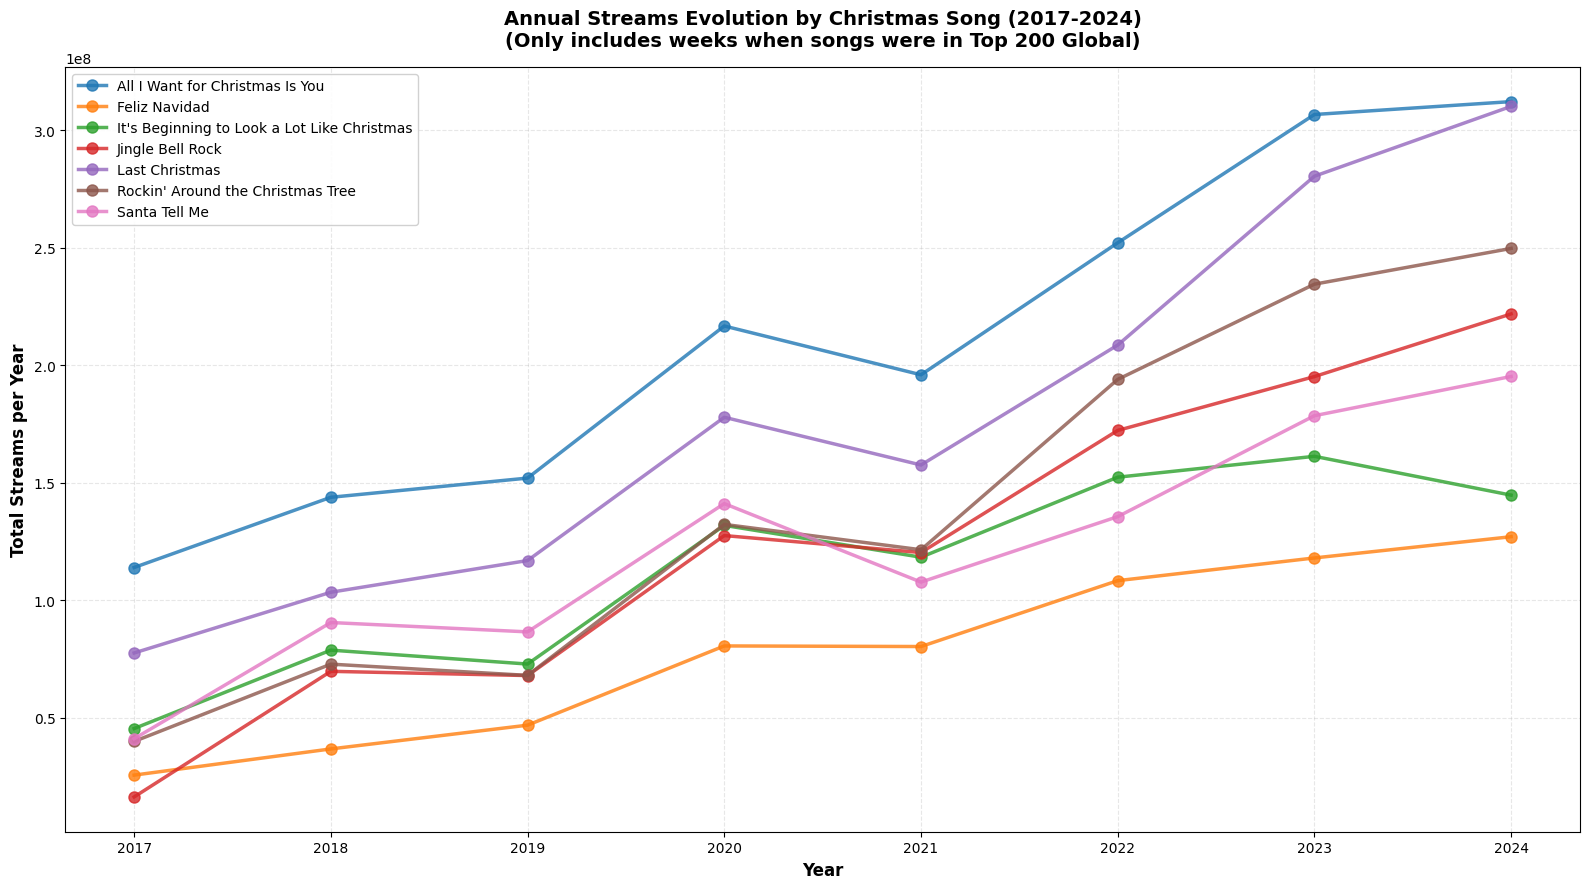

In [166]:
plt.figure(figsize=(16, 9))

songs = annual_streams['track'].unique() #gets the name of each song
print(songs)
colors = plt.cm.tab10(range(len(songs))) 

for idx, song in enumerate(songs): #for each song
    # Filters the current song data and only until 2024
    filtered_data = annual_streams[(annual_streams['track'] == song) & (annual_streams['year'] <= 2024)] #gets the data of each track quantity for each year for each song
    #filters data until 2024 not counting 2025.
    #isolates that song's data to plot one graph line at a time
    print(filtered_data)
    #plot by year on x axis and streams on y axis for each song 
    plt.plot(filtered_data['year'], filtered_data['streams'], 
             marker='o', markersize=8, linewidth=2.5, 
             label=song, color=colors[idx], alpha=0.8)
    
#general plot with all behaviors of each song
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Total Streams per Year', fontsize=12, fontweight='bold')
plt.title('Annual Streams Evolution by Christmas Song (2017-2024)\n(Only includes weeks when songs were in Top 200 Global)', 
          fontsize=14, fontweight='bold', pad=15)
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
plt.legend(loc='upper left', fontsize=10, framealpha=0.9)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# 5. Temporal Heatmap Analysis: Year × Week Evolution

------

In [167]:
# 2.4 Heatmap: Year × Week

# Filter Christmas season data (weeks 45-52 + week 1)
heatmap_data = df[df['week_of_year'].isin(list(range(45, 53)) + [1])].copy()

# Calculate total streams per year and week
heatmap_pivot = heatmap_data.groupby(['year', 'week_of_year'])['streams'].sum().reset_index()

# Create pivot table: years as rows, weeks as columns
heatmap_matrix = heatmap_pivot.pivot(index='year', columns='week_of_year', values='streams')

# Reorder columns (weeks 45-52, then 1)
week_order = list(range(45, 53)) + [1]
heatmap_matrix = heatmap_matrix[week_order]

print("Heatmap matrix shape:", heatmap_matrix.shape)
print("\nPreview of heatmap data:")
print(heatmap_matrix.head())

Heatmap matrix shape: (9, 9)

Preview of heatmap data:
week_of_year         45          46          47           48           49  \
year                                                                        
2017                NaN   3821572.0  10170447.0   31997416.0   60781133.0   
2018                NaN   5967226.0  28395297.0   54395526.0   99909342.0   
2019          5005576.0  11366100.0  19632513.0   46478480.0   95949642.0   
2020          5008815.0  12515556.0  44658002.0   77998730.0  139138702.0   
2021          6622750.0  15129983.0  53893633.0  111985039.0  145447992.0   

week_of_year           50           51           52         1   
year                                                            
2017           67591011.0   79614418.0  105485699.0        NaN  
2018          104353152.0  119741276.0  182721272.0        NaN  
2019          106235439.0  119394893.0  206710524.0        NaN  
2020          163851818.0  164214168.0  274101023.0  5241737.0  
2021          1

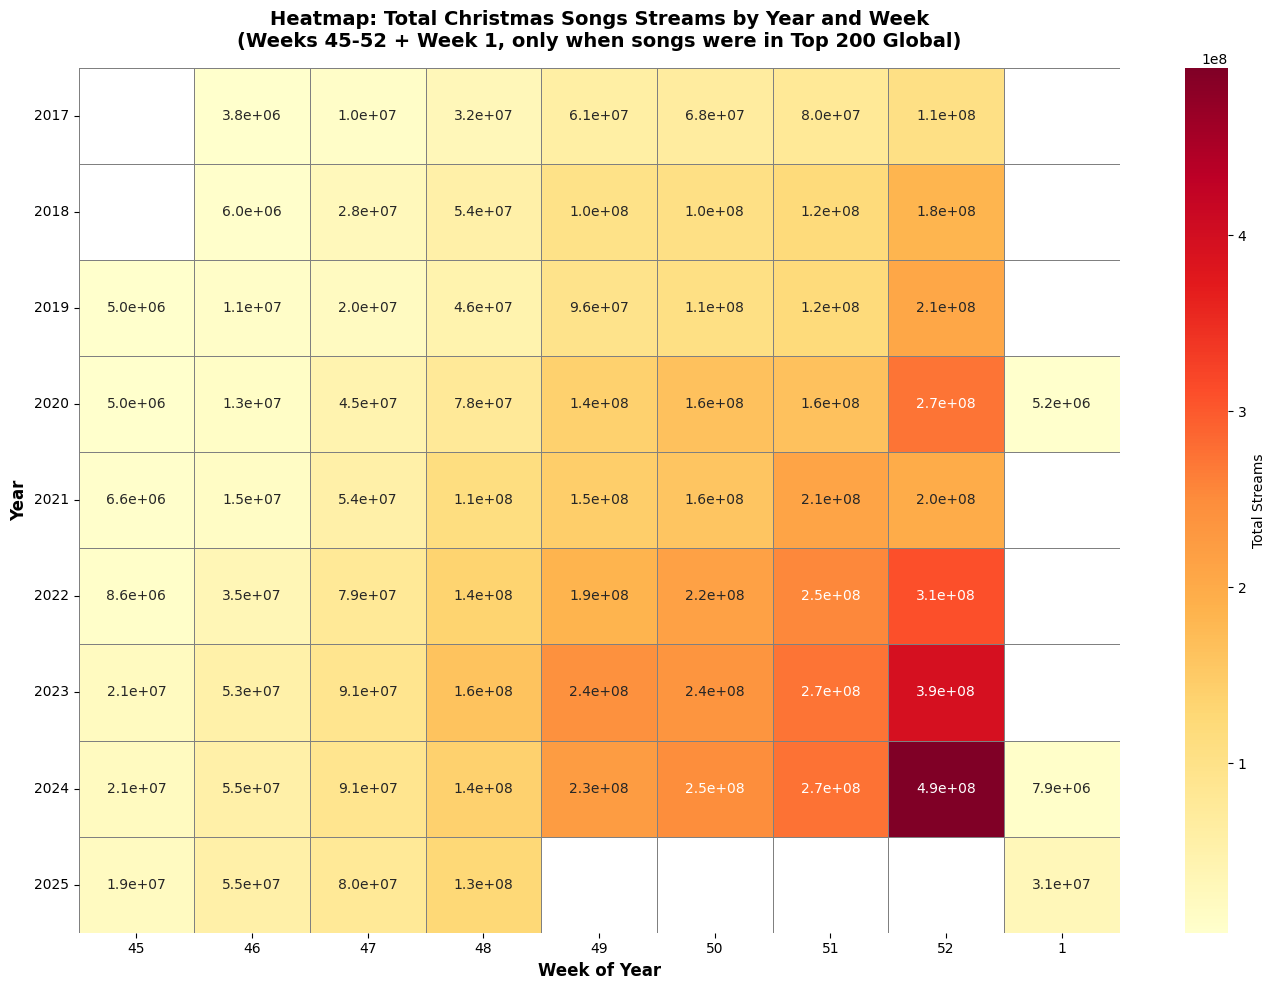

In [168]:
# Visualization: Heatmap Year × Week
plt.figure(figsize=(14, 10))

# Create heatmap
sns.heatmap(heatmap_matrix, 
            annot=True,  # Show values in cells
            fmt='.1e',   # Scientific notation
            cmap='YlOrRd',  # Color scheme (yellow-orange-red)
            cbar_kws={'label': 'Total Streams'},
            linewidths=0.5,
            linecolor='gray')

plt.title('Heatmap: Total Christmas Songs Streams by Year and Week\n(Weeks 45-52 + Week 1, only when songs were in Top 200 Global)', 
          fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Week of Year', fontsize=12, fontweight='bold')
plt.ylabel('Year', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<Figure size 1600x1000 with 0 Axes>

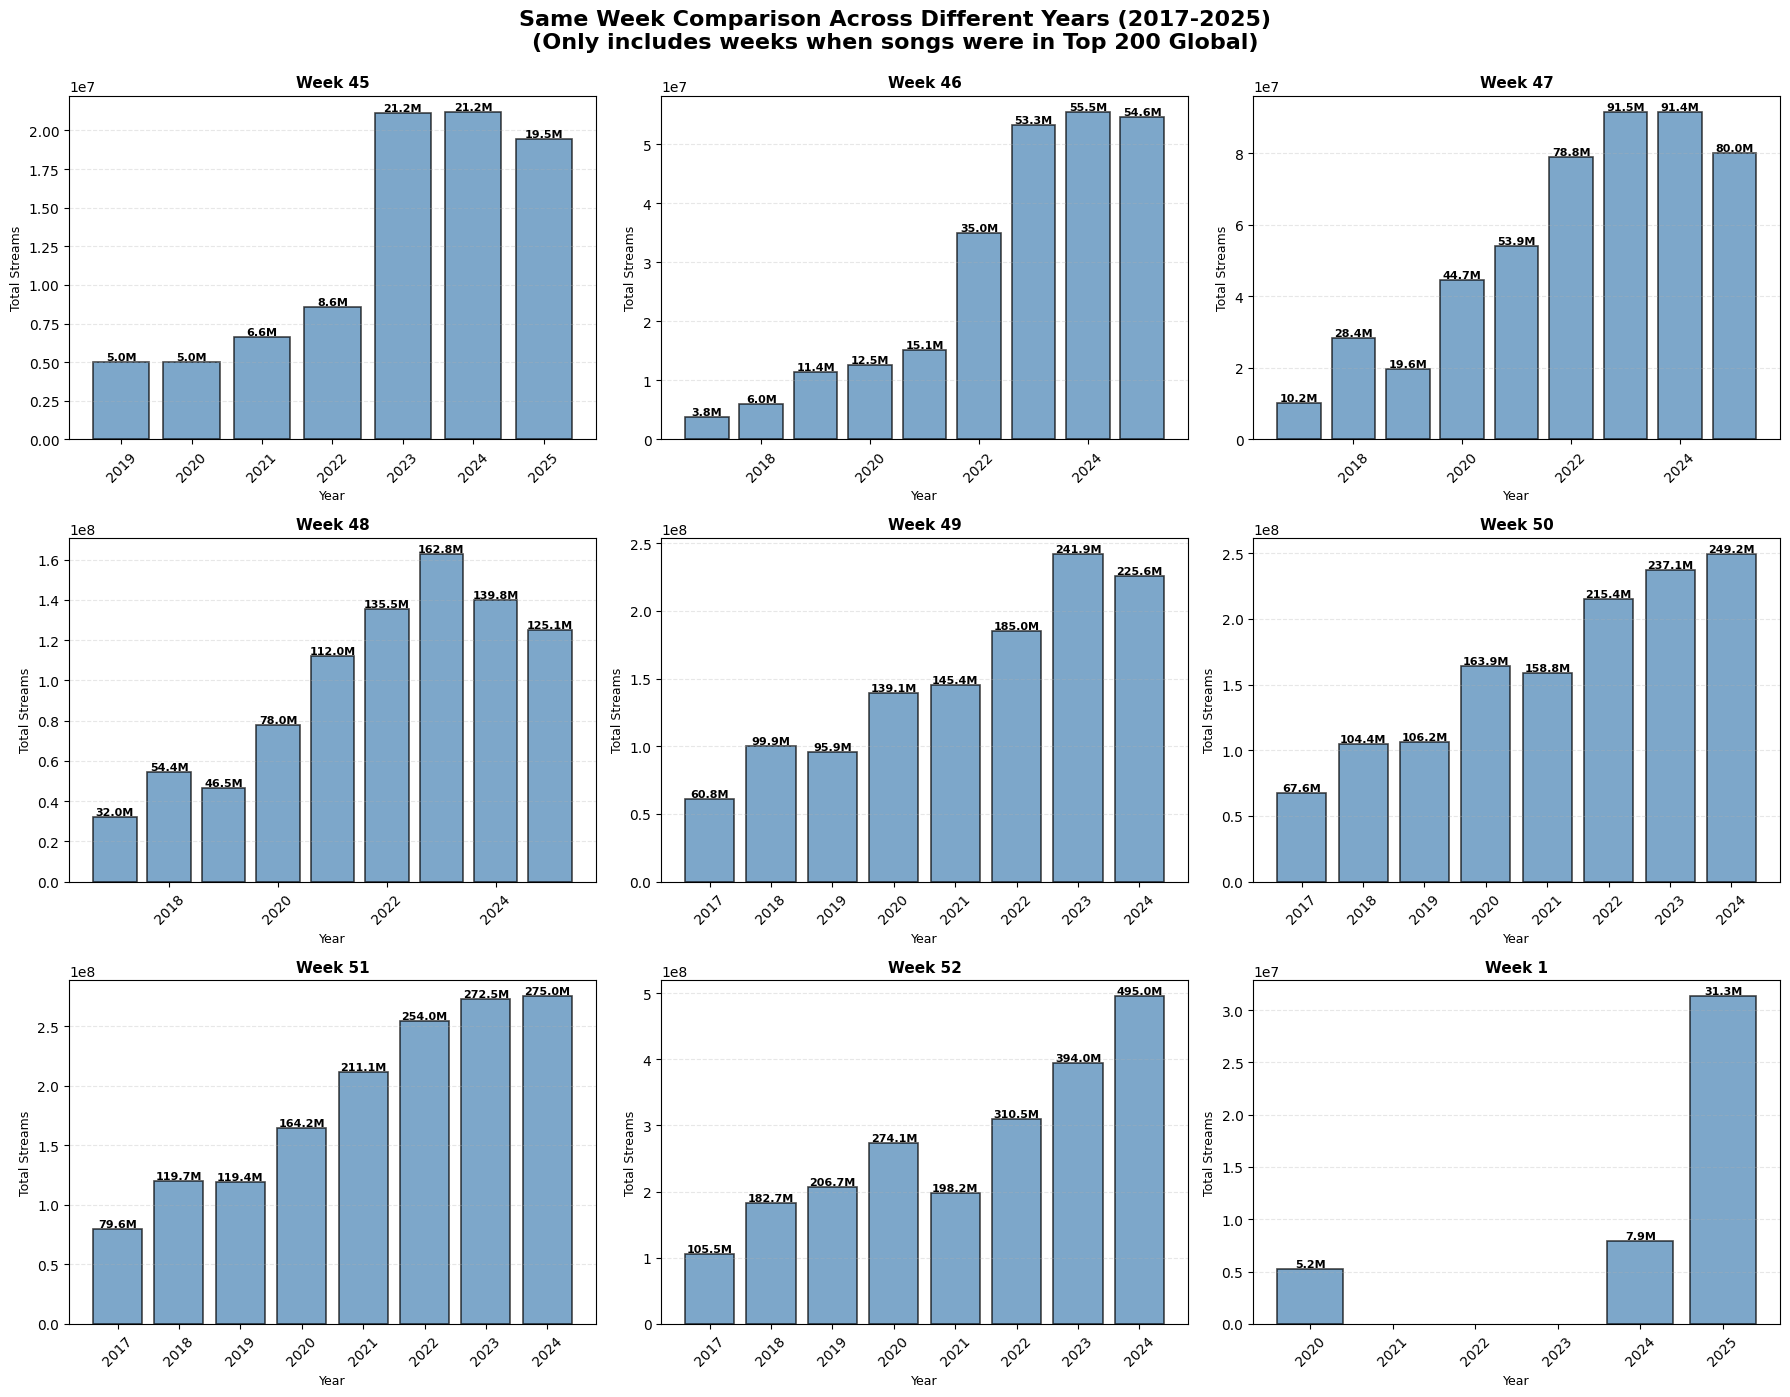

In [169]:
# Compare same week across different years
plt.figure(figsize=(16, 10))

# Create subplots for each week
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()

for idx, week in enumerate(week_order):
    week_data = heatmap_matrix[week].dropna()
    
    bars = axes[idx].bar(week_data.index, week_data.values, 
                         color='steelblue', alpha=0.7, 
                         edgecolor='black', linewidth=1.2)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                      f'{height/1e6:.1f}M',
                      ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    axes[idx].set_title(f'Week {week}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Year', fontsize=9)
    axes[idx].set_ylabel('Total Streams', fontsize=9)
    axes[idx].ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    axes[idx].grid(True, alpha=0.3, linestyle='--', axis='y')
    axes[idx].tick_params(axis='x', rotation=45)

plt.suptitle('Same Week Comparison Across Different Years (2017-2025)\n(Only includes weeks when songs were in Top 200 Global)', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

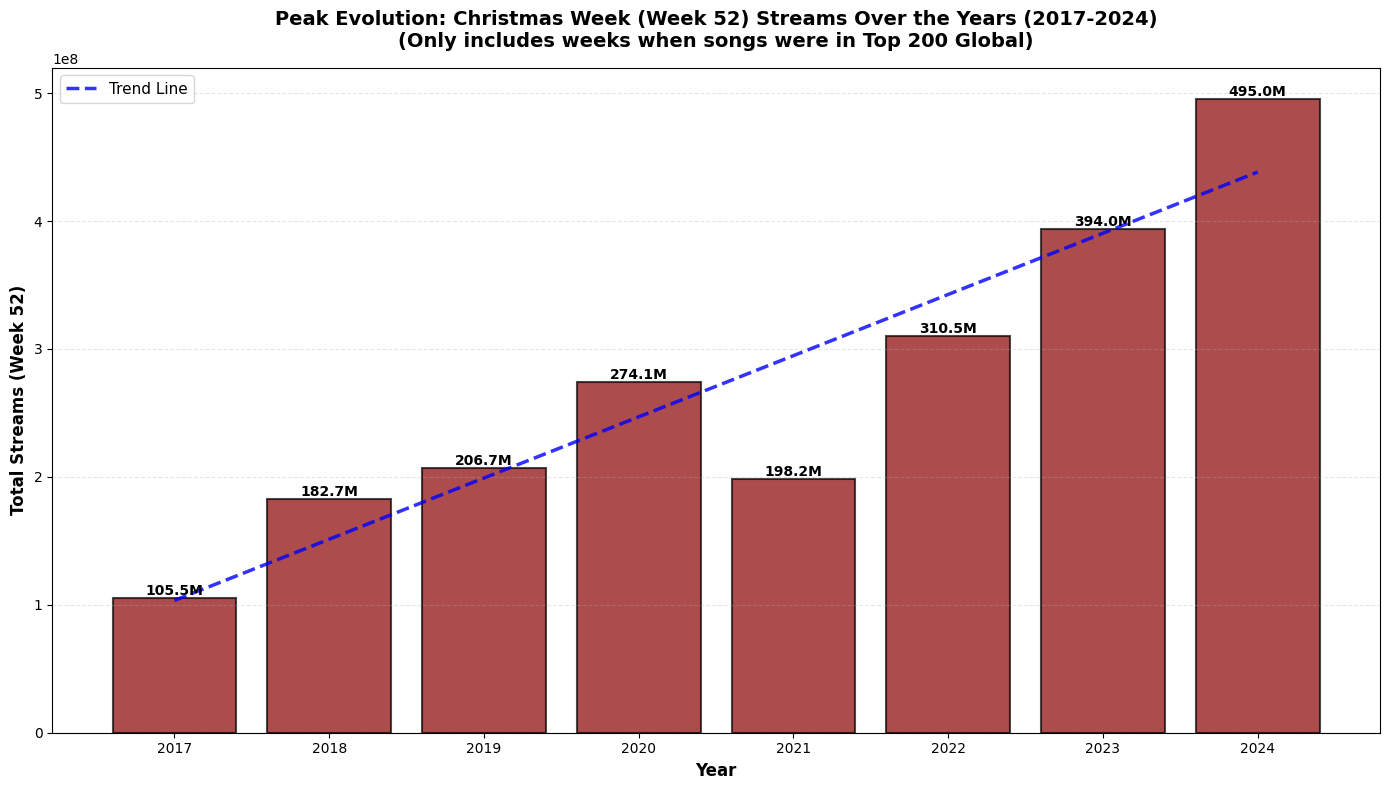

Week 52 Statistics (2017-2024):
  • Average: 270.8M streams
  • Maximum: 495.0M streams (Year 2024)
  • Minimum: 105.5M streams (Year 2017)
  • Growth (2017→2024): 369.3%


In [170]:
# Peak evolution: Week 52 (Christmas week) over the years
plt.figure(figsize=(14, 8))

# Get week 52 data
week52_data = heatmap_matrix[52].dropna()
week52_data = week52_data[week52_data.index <= 2024]  # Exclude 2025 (incomplete)

# Calculate YoY growth for week 52
week52_growth = week52_data.pct_change() * 100

# Create bar chart
fig, ax1 = plt.subplots(figsize=(14, 8))

bars = ax1.bar(week52_data.index, week52_data.values, 
               color='darkred', alpha=0.7, edgecolor='black', linewidth=1.5)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height/1e6:.1f}M',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add trend line
z = np.polyfit(week52_data.index, week52_data.values, 1)
p = np.poly1d(z)
ax1.plot(week52_data.index, p(week52_data.index), 
         "b--", linewidth=2.5, label='Trend Line', alpha=0.8)

ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Total Streams (Week 52)', fontsize=12, fontweight='bold')
ax1.set_title('Peak Evolution: Christmas Week (Week 52) Streams Over the Years (2017-2024)\n(Only includes weeks when songs were in Top 200 Global)', 
              fontsize=14, fontweight='bold', pad=15)
ax1.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
ax1.grid(True, alpha=0.3, linestyle='--', axis='y')
ax1.legend(loc='upper left', fontsize=11)

plt.tight_layout()
plt.show()

# Print statistics
print(f"Week 52 Statistics (2017-2024):")
print(f"  • Average: {week52_data.mean()/1e6:.1f}M streams")
print(f"  • Maximum: {week52_data.max()/1e6:.1f}M streams (Year {week52_data.idxmax()})")
print(f"  • Minimum: {week52_data.min()/1e6:.1f}M streams (Year {week52_data.idxmin()})")
print(f"  • Growth (2017→2024): {((week52_data.iloc[-1]/week52_data.iloc[0])-1)*100:.1f}%")